In [2]:
!pip install --no-index seaborn

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2023/x86-64-v3, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2023/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/seaborn-0.13.2+computecanada-py3-none-any.whl


df.columns = Index(['image_index', 'true_label_idx', 'true_label', 'predicted_label_idx',
       'predicted_label', 'i1', 'bear_prob', 'elephant_prob', 'person_prob',
       'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob',
       'bird_prob', 'zebra_prob'],
      dtype='object')
prob_columns = ['bear_prob', 'elephant_prob', 'person_prob', 'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob', 'bird_prob', 'zebra_prob']
Saved I2 matrix to B_I2_hvm200_100ms.npy
Saved I1 vector to B_I1_hvm200_100ms.npy

Results for 100ms delay:
Overall Accuracy (I1 mean): 0.6498


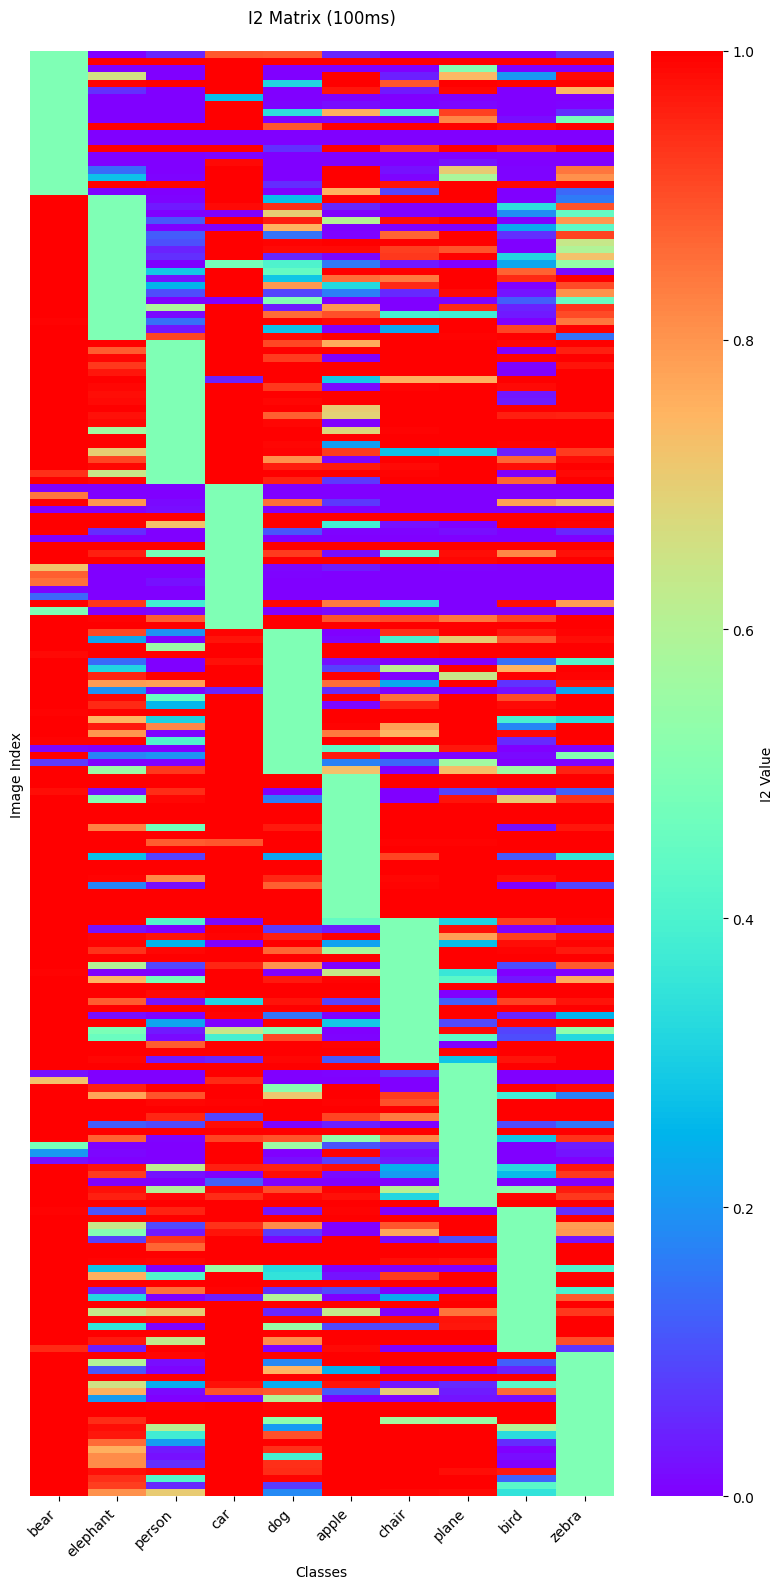

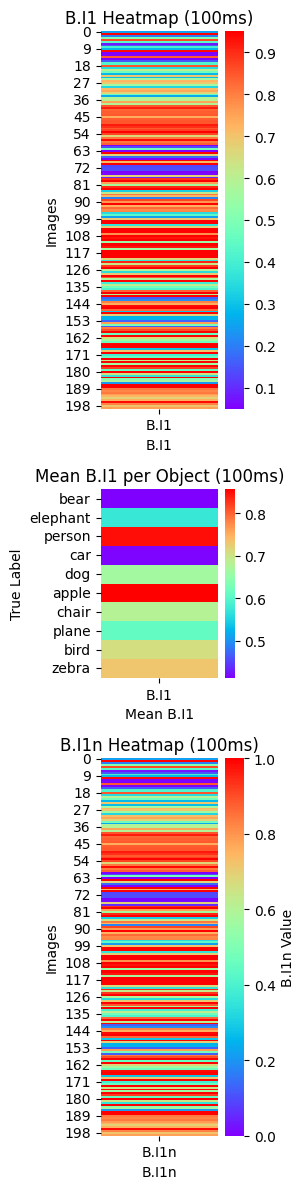

df.columns = Index(['image_index', 'true_label_idx', 'true_label', 'predicted_label_idx',
       'predicted_label', 'i1', 'bear_prob', 'elephant_prob', 'person_prob',
       'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob',
       'bird_prob', 'zebra_prob'],
      dtype='object')
prob_columns = ['bear_prob', 'elephant_prob', 'person_prob', 'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob', 'bird_prob', 'zebra_prob']
Saved I2 matrix to B_I2_hvm200_400ms.npy
Saved I1 vector to B_I1_hvm200_400ms.npy

Results for 400ms delay:
Overall Accuracy (I1 mean): 0.6341


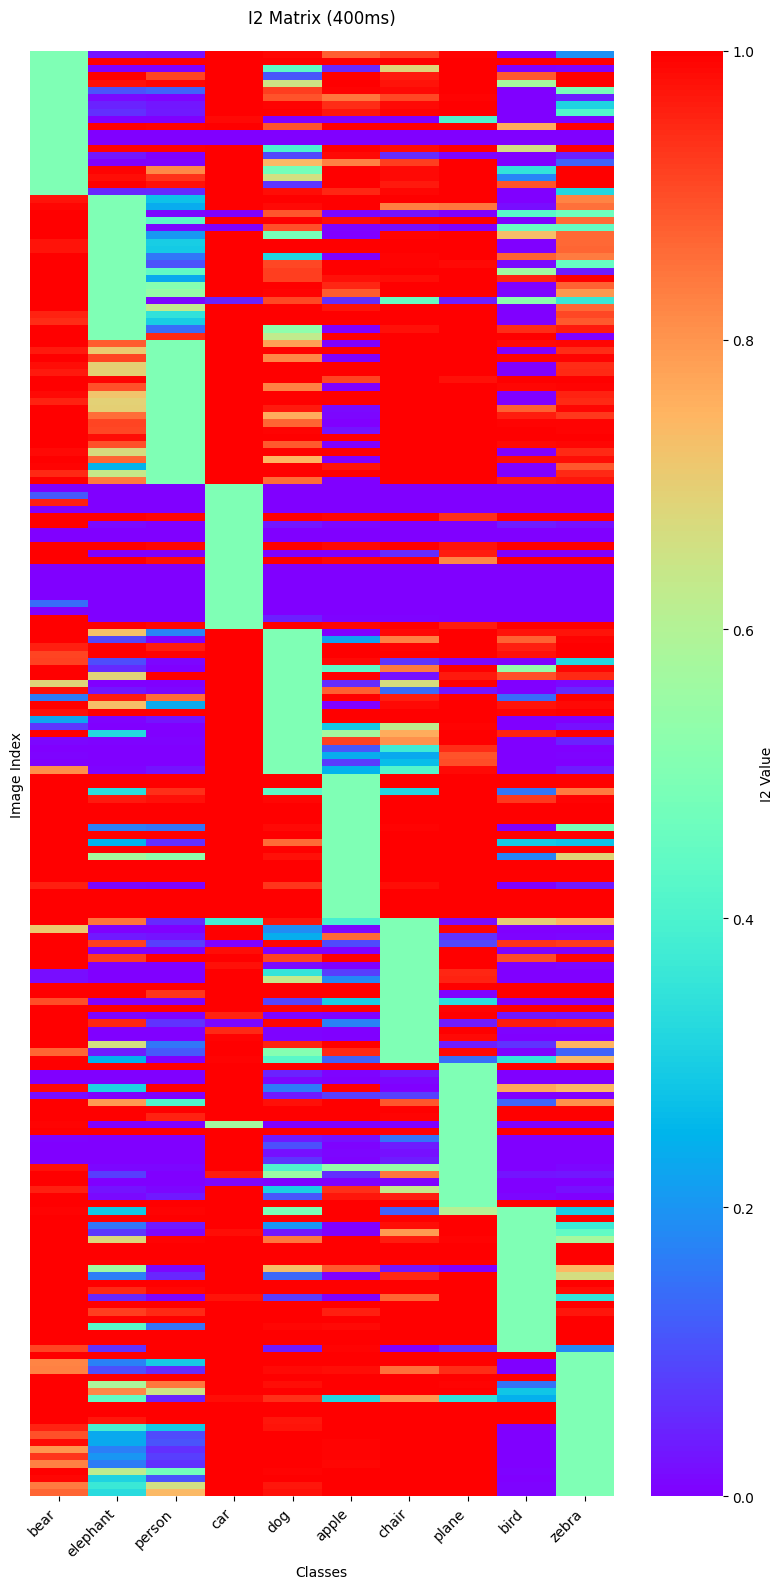

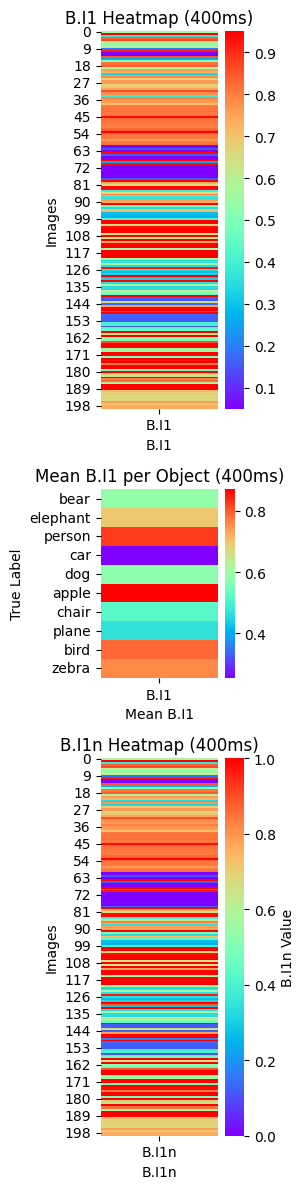

df.columns = Index(['image_index', 'true_label_idx', 'true_label', 'predicted_label_idx',
       'predicted_label', 'i1', 'bear_prob', 'elephant_prob', 'person_prob',
       'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob',
       'bird_prob', 'zebra_prob'],
      dtype='object')
prob_columns = ['bear_prob', 'elephant_prob', 'person_prob', 'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob', 'bird_prob', 'zebra_prob']
Saved I2 matrix to B_I2_hvm200_800ms.npy
Saved I1 vector to B_I1_hvm200_800ms.npy

Results for 800ms delay:
Overall Accuracy (I1 mean): 0.5717


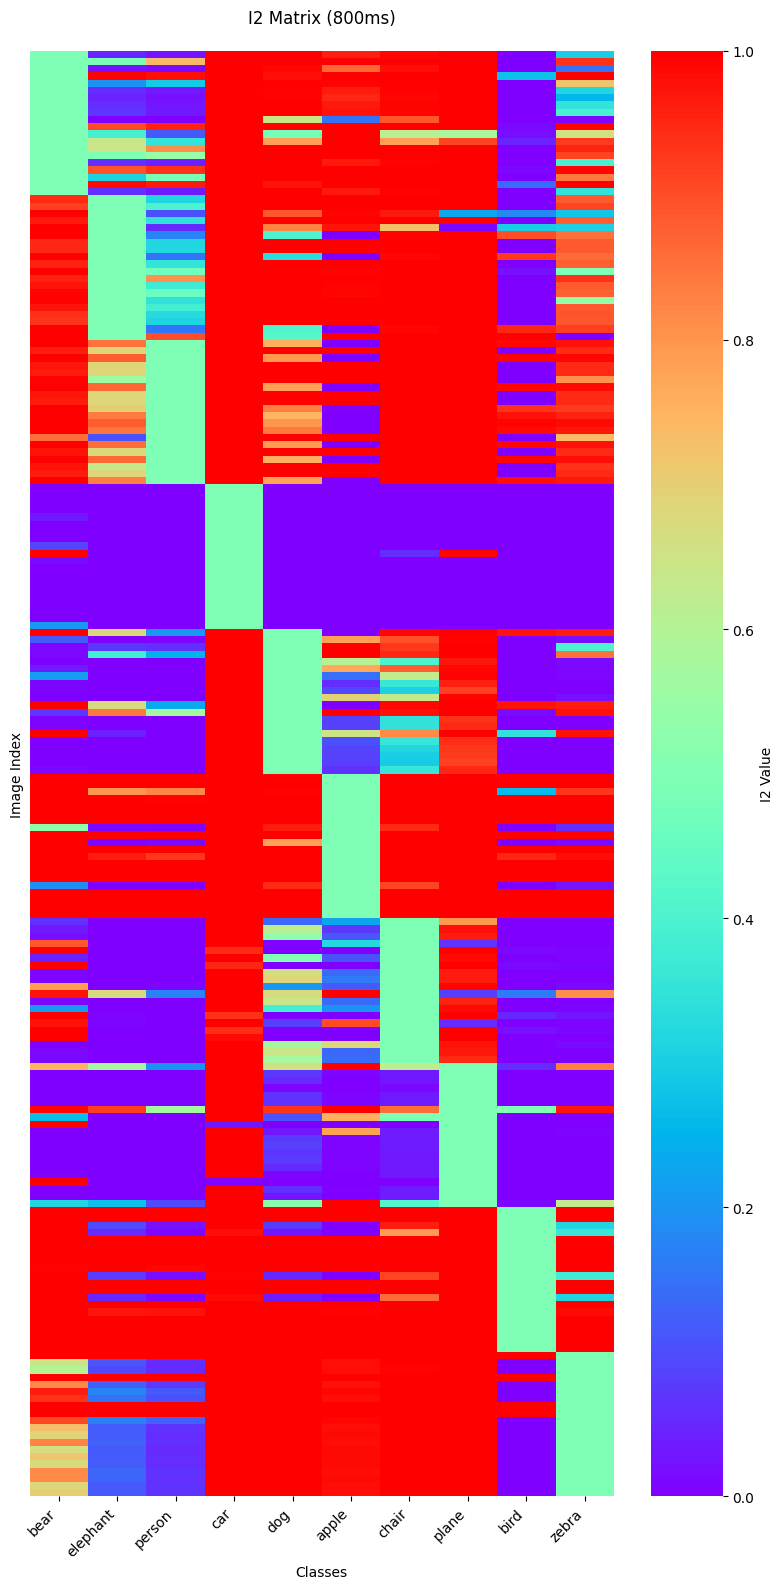

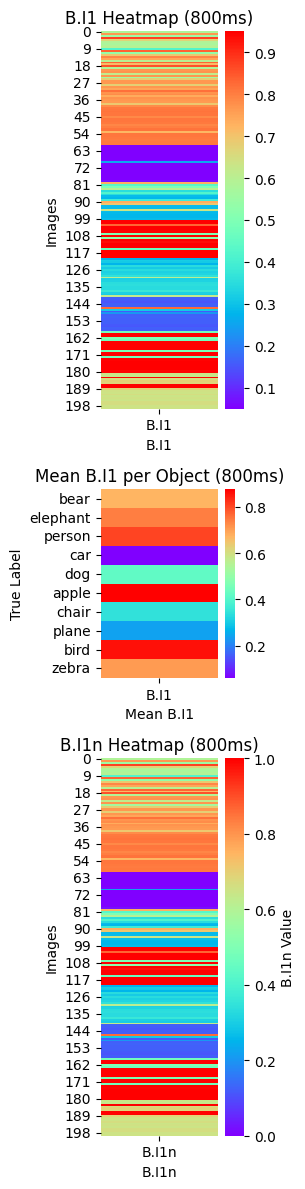

df.columns = Index(['image_index', 'true_label_idx', 'true_label', 'predicted_label_idx',
       'predicted_label', 'i1', 'bear_prob', 'elephant_prob', 'person_prob',
       'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob',
       'bird_prob', 'zebra_prob'],
      dtype='object')
prob_columns = ['bear_prob', 'elephant_prob', 'person_prob', 'car_prob', 'dog_prob', 'apple_prob', 'chair_prob', 'plane_prob', 'bird_prob', 'zebra_prob']
Saved I2 matrix to B_I2_hvm200_1200ms.npy
Saved I1 vector to B_I1_hvm200_1200ms.npy

Results for 1200ms delay:
Overall Accuracy (I1 mean): 0.5516


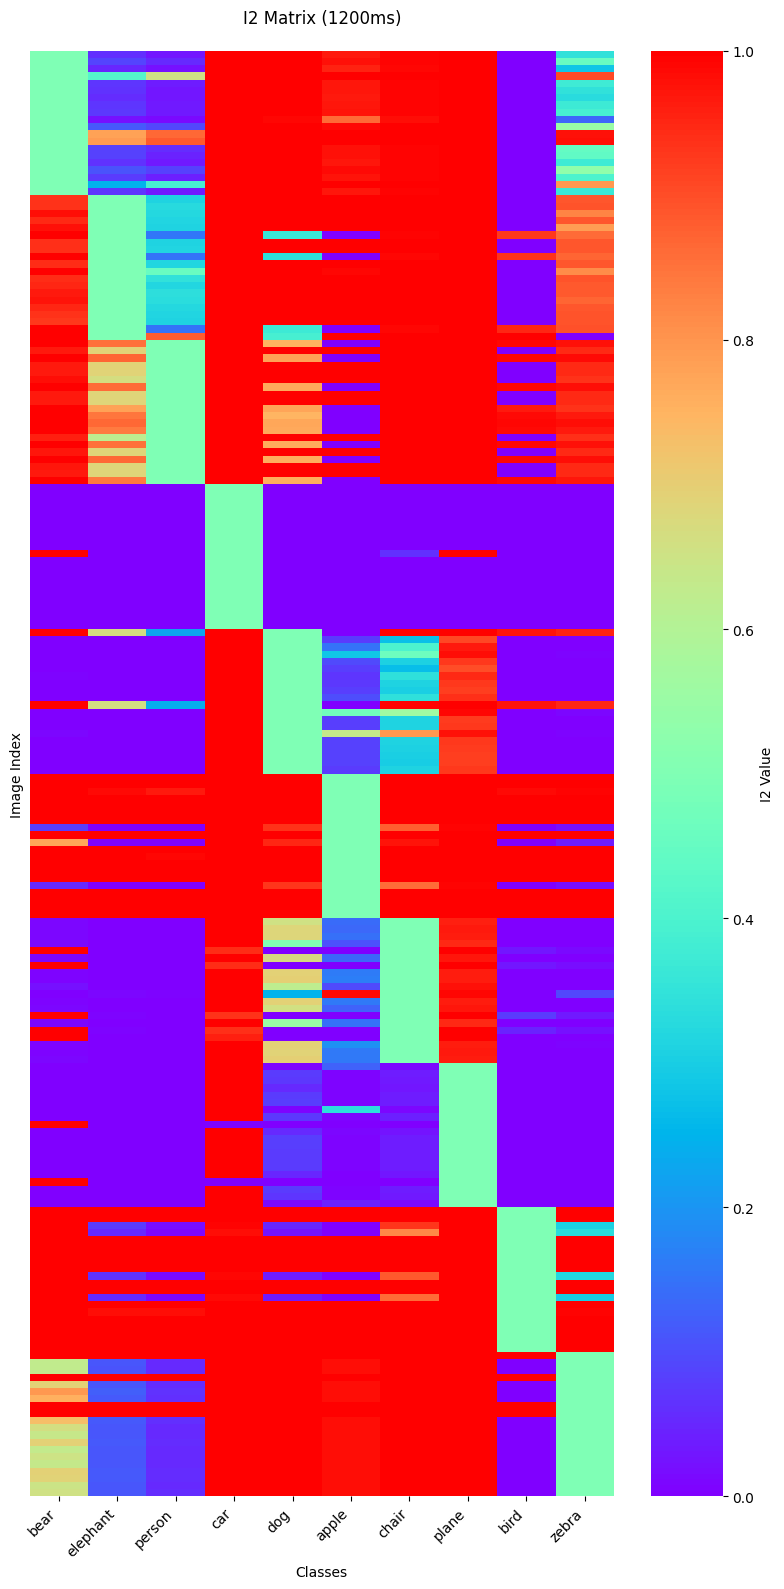

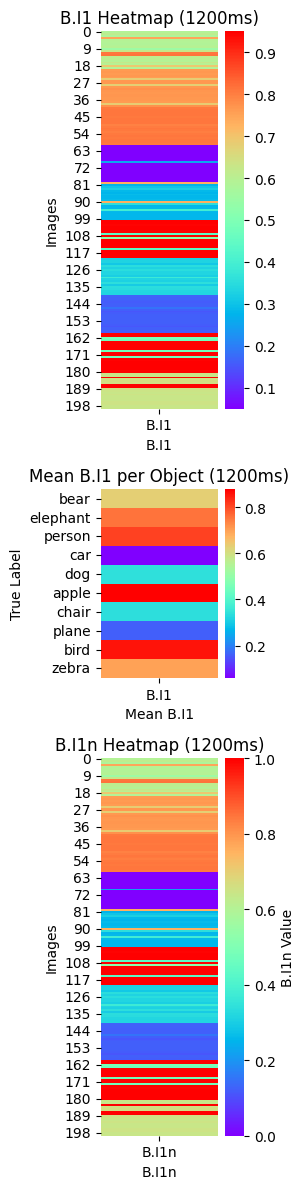


Correlations with 100ms delay:
Correlation with 400ms delay: 0.7589
Correlation with 800ms delay: 0.4054
Correlation with 1200ms delay: 0.3210


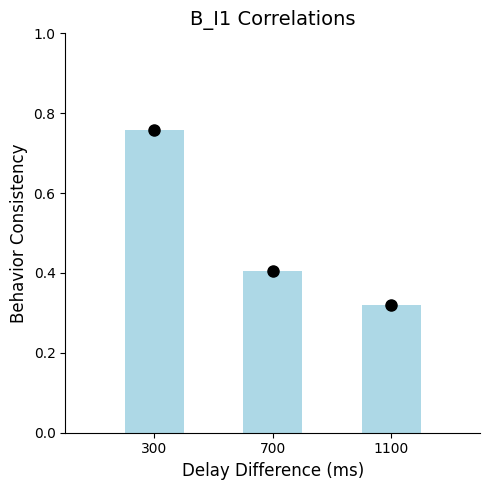

delays = (100, 400, 800, 1200)
acc_values = (0.6497701163731606, 0.6341095927948143, 0.5716948009513231, 0.5516149908845951)


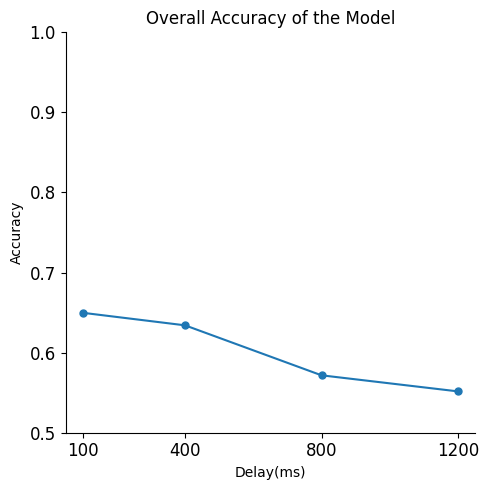

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def calculate_i2_matrix(data, prob_columns):
    """Calculate I2 matrix as before"""
    i2_matrix = np.zeros((200, 10))

    prob_columns = [f"{label}_prob" for label in prob_columns]
    print(f"{prob_columns = }")
    
    for i in range(200):
        true_class_idx = data.iloc[i]['true_label_idx']
        p_true = data.iloc[i][prob_columns[true_class_idx]]
        
        for j in range(10):
            if j != true_class_idx:
                p_other = data.iloc[i][prob_columns[j]]
                i2_matrix[i, j] = p_true / (p_true + p_other)
            else:
                i2_matrix[i, j] = 0.5
                
    return i2_matrix

def calculate_i1_matrix(i2_matrix):
    """Calculate I1 matrix by taking row-wise average of I2 matrix"""
    return np.mean(i2_matrix, axis=1)

def save_matrices(i2_matrix, i1_matrix, delay, dataset_name="hvm200"):
    """Save I2 and I1 matrices with standardized naming convention"""
    # Save I2 matrix
    i2_filename = f"B_I2_{dataset_name}_{delay}ms.npy"
    np.save(i2_filename, i2_matrix)
    print(f"Saved I2 matrix to {i2_filename}")
    
    # Save I1 vector
    i1_filename = f"B_I1_{dataset_name}_{delay}ms.npy"
    np.save(i1_filename, i1_matrix)
    print(f"Saved I1 vector to {i1_filename}")

def calculate_overall_accuracy(i1_matrix):
    """Calculate overall accuracy as mean of I1 matrix"""
    return np.mean(i1_matrix)

# [Previous plotting functions remain unchanged]
def plot_i2_matrix(i2_matrix, delay, class_names):
    """Plot I2 matrix heatmap without numbers"""
    plt.figure(figsize=(8, 16))
    
    sns.heatmap(i2_matrix, 
                cmap='rainbow',
                xticklabels=class_names,
                yticklabels=False,
                cbar_kws={'label': 'I2 Value'})
    
    plt.title(f'I2 Matrix ({delay}ms)', pad=20)
    plt.xlabel('Classes')
    plt.ylabel('Image Index')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'i2_matrix_{delay}ms.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_heatmaps(i1_matrix, df, delay):
    """Plot I1 heatmaps using provided function"""
    # Prepare data for heatmaps
    df_heatmap_bi1 = pd.DataFrame({
        'image_name': range(len(i1_matrix)),
        'B.I1': i1_matrix
    })
    
    # Calculate normalized I1 (B.I1n)
    bi1n = (i1_matrix - i1_matrix.min()) / (i1_matrix.max() - i1_matrix.min())
    df_heatmap_bi1n = pd.DataFrame({
        'image_name': range(len(bi1n)),
        'B.I1n': bi1n
    })
    
    # Calculate mean per object
    mean_per_object = pd.DataFrame({
        'true_label': df['true_label'],
        'B.I1': i1_matrix
    }).groupby('true_label')['B.I1'].mean()
    
    # Get label order
    label_order = df['true_label'].unique()
    
    # Create figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3, 12), 
                                       gridspec_kw={'height_ratios': [0.4, 0.2, 0.4]})
    
    # B.I1 heatmap
    sns.heatmap(df_heatmap_bi1.set_index('image_name')[['B.I1']], 
                cmap='rainbow', cbar=True, ax=ax1,
                vmin=df_heatmap_bi1['B.I1'].min(), vmax=df_heatmap_bi1['B.I1'].max())
    ax1.set_xlabel('B.I1')
    ax1.set_ylabel('Images')
    ax1.set_title(f'B.I1 Heatmap ({delay}ms)')
    
    # Mean per object heatmap
    sns.heatmap(mean_per_object.loc[label_order].to_frame(), cmap='rainbow', cbar=True, ax=ax2,
                vmin=mean_per_object.min(), vmax=mean_per_object.max())
    ax2.set_xlabel('Mean B.I1')
    ax2.set_ylabel('True Label')
    ax2.set_title(f'Mean B.I1 per Object ({delay}ms)')
    
    # B.I1n heatmap
    sns.heatmap(df_heatmap_bi1n.set_index('image_name')[['B.I1n']], 
                cmap='rainbow', cbar_kws={'label': 'B.I1n Value'}, ax=ax3,
                vmin=df_heatmap_bi1n['B.I1n'].min(), vmax=df_heatmap_bi1n['B.I1n'].max())
    ax3.set_xlabel('B.I1n')
    ax3.set_ylabel('Images')
    ax3.set_title(f'B.I1n Heatmap ({delay}ms)')
    
    plt.tight_layout()
    plt.savefig(f'bi1_bi1n_heatmap_{delay}ms.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_delay_consistencies(consistencies):
    """Plot delay consistencies"""
    fig, ax = plt.subplots(figsize=(5, 5))
    
    x_pos = np.array([300, 700, 1100])
    values = [consistencies[d] for d in sorted(consistencies.keys())]
    
    bars = ax.bar(x_pos, values, color='lightblue', width=200, align='center')
    
    for x, y in zip(x_pos, values):
        ax.plot(x, y, 'ko', markersize=8)
    
    ax.set_xlabel('Delay Difference (ms)', fontsize=12)
    ax.set_ylabel('Behavior Consistency', fontsize=12)
    ax.set_title('B_I1 Correlations', fontsize=14)
    ax.set_ylim(0, 1.0)
    ax.set_xlim(0, 1400)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([str(x) for x in x_pos])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('delay_consistencies.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_accuracy(accuracies):
    """Plot overall accuracy"""
    delays, acc_values = zip(*accuracies)
    print(f"{delays = }")
    print(f"{acc_values = }")
    
    plt.figure(figsize=(5, 5))
    plt.plot(delays, acc_values, "o-", markersize=5)
    
    plt.title("Overall Accuracy of the Model")
    plt.xlabel("Delay(ms)")
    plt.xticks(delays)
    plt.xlim(min(delays) - 50, max(delays) + 50)
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1)
    plt.grid(False)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()
    plt.savefig('accuracy_vs_delay.png', dpi=500, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Define file paths
    files = {
        100: 'version_5_use_sth200_dataset/sth200_resnetlstm_logistic_evaluation_full_dataset_100ms.csv',
        400: 'version_5_use_sth200_dataset/sth200_resnetlstm_logistic_evaluation_full_dataset_400ms.csv',
        800: 'version_5_use_sth200_dataset/sth200_resnetlstm_logistic_evaluation_full_dataset_800ms.csv',
        1200: 'version_5_use_sth200_dataset/sth200_resnetlstm_logistic_evaluation_full_dataset_1200ms.csv'
    }

    coco1600_to_hvm200 = {
        "bear": "bear",
        "ELEPHANT_M": "elephant",
        "face0001": "person",
        "alfa155": "car",
        "breed_pug": "dog",
        "Apple_Fruit_obj": "apple",
        "_001": "chair",
        "f16": "plane",
        "lo_poly_animal_CHICKDEE": "bird",
        "zebra": "zebra"
    }
    
    coco200_label_order = list(coco1600_to_hvm200.keys())
    hvm200_label_order = list(coco1600_to_hvm200.values())
    
    # Initialize storage for results
    i2_matrices = {}
    i1_matrices = {}
    accuracies = []
    
    # Process each delay
    for delay, file in files.items():
        # Read data
        df = pd.read_csv(file)
        print(f"{df.columns = }")
        
        # Calculate matrices and accuracy
        i2_matrices[delay] = calculate_i2_matrix(df, hvm200_label_order)
        i1_matrices[delay] = calculate_i1_matrix(i2_matrices[delay])
        accuracy = calculate_overall_accuracy(i1_matrices[delay])
        accuracies.append((delay, accuracy))
        
        # Save matrices with standardized naming
        save_matrices(i2_matrices[delay], i1_matrices[delay], delay)
        
        # Print accuracy
        print(f"\nResults for {delay}ms delay:")
        print(f"Overall Accuracy (I1 mean): {accuracy:.4f}")
        
        # Plot matrices
        plot_i2_matrix(i2_matrices[delay], delay, hvm200_label_order)
        plot_heatmaps(i1_matrices[delay], df, delay)
    
    # Calculate correlations
    correlations = {
        300: stats.pearsonr(i1_matrices[100], i1_matrices[400])[0],
        700: stats.pearsonr(i1_matrices[100], i1_matrices[800])[0],
        1100: stats.pearsonr(i1_matrices[100], i1_matrices[1200])[0]
    }
    
    # Print correlations
    print("\nCorrelations with 100ms delay:")
    for diff, corr in correlations.items():
        print(f"Correlation with {diff+100}ms delay: {corr:.4f}")
    
    # Plot delay consistencies
    plot_delay_consistencies(correlations)
    
    # Plot accuracy
    plot_accuracy(sorted(accuracies))